In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
dataset_path = 'E:\\workspace\\ML_study\\AI_project\\dataset0\\train\\'
train_data = 'E:\\workspace\\ML_study\\AI_project\\dataset1\\train\\'
valid_data = 'E:\\workspace\\ML_study\\AI_project\\dataset1\\valid\\'

In [3]:
image_size = (224, 224)
batch_size = 16
epochs = 100
patience = 8
# patience: 학습 조기종료 인자. val_loss가 10epoch 동안 낮아지지 않으면 학습 종료

In [4]:
# directory tree
# |- Discovered
# |- non_died
# |- you_died
train_set = image_dataset_from_directory(
    train_data,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)
valid_set = image_dataset_from_directory(
    valid_data,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

Found 1595 files belonging to 2 classes.
Found 428 files belonging to 2 classes.


In [ ]:
# crop image dataset
# directory tree
# |- non_died
# |- you_died
train_set = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

In [ ]:
valid_set = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

In [5]:
labels = train_set.class_names
print(labels)
# ['non_died', 'you_died']

['non_died', 'you_died']


In [6]:
# 학습 성능 높이기
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_set = valid_set.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
# 데이터 증강
data_augmentation = Sequential(
    [
        layers.experimental.preprocessing.RandomFlip(
            'horizontal',
            input_shape=(224, 224, 3)
        ),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

In [8]:
# 모델 구조 VGG-16 모방
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(224, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(224, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(224, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2, activation='softmax'),
])

In [ ]:
# 모델 구조 VGG 모방
# VGG-13 따라해보기
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

In [ ]:
# 모델 구조 VGG-16 모방
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(4000, activation='relu'),
    layers.Dense(4000, activation='relu'),
    layers.Dense(2000, activation='relu'),
    layers.Dense(2000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax'),
])


In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3)
])

In [ ]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3)
])

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      9280      
                                                      

In [10]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=patience) # patience :: 참을성 인자, val_loss 값이 더이상 줄어들지 않으면 조기 종료
    # tf.keras.callbacks.ModelCheckpoint('save_at_{epoch}.h5'), # 학습 중간저장 체크포인트
]

In [11]:
history = model.fit(
    train_set,
    validation_data=valid_set,
    callbacks=callbacks,
    epochs=epochs
)

Epoch 1/100
100/100 [==============================] - 19s 102ms/step - loss: 0.6834 - accuracy: 0.5467 - val_loss: 0.6202 - val_accuracy: 0.6449
Epoch 2/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6046 - accuracy: 0.6696 - val_loss: 0.3308 - val_accuracy: 0.8621
Epoch 3/100
100/100 [==============================] - 8s 80ms/step - loss: 0.2914 - accuracy: 0.9003 - val_loss: 0.1615 - val_accuracy: 0.9416
Epoch 4/100
100/100 [==============================] - 8s 81ms/step - loss: 0.2112 - accuracy: 0.9373 - val_loss: 0.1511 - val_accuracy: 0.9556
Epoch 5/100
100/100 [==============================] - 8s 81ms/step - loss: 0.1110 - accuracy: 0.9630 - val_loss: 0.1126 - val_accuracy: 0.9650
Epoch 6/100
100/100 [==============================] - 8s 84ms/step - loss: 0.0665 - accuracy: 0.9831 - val_loss: 0.0432 - val_accuracy: 0.9860
Epoch 7/100
100/100 [==============================] - 8s 82ms/step - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.0076 - val_accurac

In [15]:
model.save('./save_model_19_dataset1_class2')
model.save('./save_model_19_dataset1class2.h5', save_format='h5')

INFO:tensorflow:Assets written to: ./save_model_19_dataset1_class2\assets


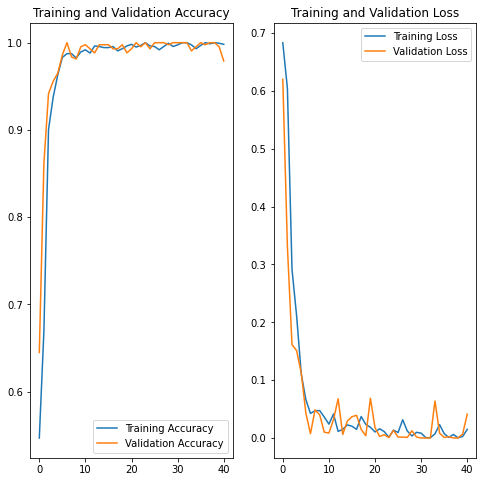

<Figure size 432x288 with 0 Axes>

In [12]:
early_epoch = history.epoch[-1] + 1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

# 학습 종료시 epoch 기록
epochs_range = range(early_epoch)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('./model_19_dataset1_graph.png', facecolor='#FFFFFF')

In [13]:
test_data = 'E:\\workspace\\ML_study\\AI_project\\dataset1\\test\\'
# 테스트 데이터 평가
test_set = image_dataset_from_directory(
    test_data,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)
loss, accuracy = model.evaluate(test_set)
print('Test Loss : ', loss)
print('Test Accuracy : ', accuracy)

Found 141 files belonging to 2 classes.
9/9 [==============================] - 1s 63ms/step - loss: 0.0432 - accuracy: 0.9858
Test Loss :  0.043156471103429794
Test Accuracy :  0.9858155846595764


In [14]:
loss, accuracy = model.evaluate(valid_set)
print('Test Loss : ', loss)
print('Test Accuracy : ', accuracy)

27/27 [==============================] - 1s 27ms/step - loss: 0.0414 - accuracy: 0.9790
Test Loss :  0.04137945547699928
Test Accuracy :  0.9789719581604004
